# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval")
print("------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
       
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("Skipping")

print("------------------")
print("Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 : comodoro rivadavia
Processing Record 2 of Set 1 : saskylakh
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : manzil kamil
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : jamestown
Processing Record 7 of Set 1 : thompson
Skipping
Processing Record 8 of Set 1 : kruisfontein
Processing Record 9 of Set 1 : bardiyah
Processing Record 10 of Set 1 : wukari
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : baker city
Processing Record 13 of Set 1 : bredasdorp
Processing Record 14 of Set 1 : port elizabeth
Processing Record 15 of Set 1 : busselton
Processing Record 16 of Set 1 : hermanus
Processing Record 17 of Set 1 : bambous virieux
Processing Record 18 of Set 1 : swinford
Processing Record 19 of Set 1 : faya
Processing Record 20 of Set 1 : qaanaaq
Processing Record 21 of Set 1 : yulara
Processing Record 22 of Set 1 : georgetown
Skipping
Processing 

Processing Record 41 of Set 4 : port macquarie
Processing Record 42 of Set 4 : galle
Processing Record 43 of Set 4 : dingle
Processing Record 44 of Set 4 : tautira
Processing Record 45 of Set 4 : touros
Processing Record 46 of Set 4 : sorong
Processing Record 47 of Set 4 : nabire
Processing Record 48 of Set 4 : damavand
Processing Record 49 of Set 4 : aloleng
Processing Record 50 of Set 4 : port augusta
Processing Record 0 of Set 5 : aklavik
Processing Record 1 of Set 5 : hirara
Processing Record 2 of Set 5 : tongren
Processing Record 3 of Set 5 : strasice
Processing Record 4 of Set 5 : saint-augustin
Processing Record 5 of Set 5 : flinders
Processing Record 6 of Set 5 : port blair
Processing Record 7 of Set 5 : ancud
Processing Record 8 of Set 5 : vila do maio
Processing Record 9 of Set 5 : norman wells
Processing Record 10 of Set 5 : ixtapa
Processing Record 11 of Set 5 : atambua
Processing Record 12 of Set 5 : faanui
Processing Record 13 of Set 5 : dongsheng
Processing Record 14 of 

Processing Record 33 of Set 8 : whyalla
Processing Record 34 of Set 8 : warragul
Processing Record 35 of Set 8 : koumac
Processing Record 36 of Set 8 : port keats
Processing Record 37 of Set 8 : sola
Processing Record 38 of Set 8 : nome
Processing Record 39 of Set 8 : ipixuna
Skipping
Processing Record 40 of Set 8 : bonthe
Processing Record 41 of Set 8 : cockburn town
Skipping
Processing Record 42 of Set 8 : korla
Processing Record 43 of Set 8 : tres lagoas
Processing Record 44 of Set 8 : jacmel
Processing Record 45 of Set 8 : opuwo
Processing Record 46 of Set 8 : tazovskiy
Processing Record 47 of Set 8 : digby
Processing Record 48 of Set 8 : ligayan
Processing Record 49 of Set 8 : zhigalovo
Processing Record 50 of Set 8 : nhulunbuy
Processing Record 0 of Set 9 : sambava
Processing Record 1 of Set 9 : iqaluit
Processing Record 2 of Set 9 : karratha
Processing Record 3 of Set 9 : sungaipenuh
Processing Record 4 of Set 9 : torit
Processing Record 5 of Set 9 : botucatu
Processing Record 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Latitude" : latitude,
                "Longitude" : longitude,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [6]:
weather_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Latitude      558
Longitude     558
Max Temp      558
Wind Speed    558
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.loc[weather_df['Humidity'] <= 100]
weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Comodoro Rivadavia,0,AR,1646588231,34,-45.8667,-67.5000,67.86,10.36
1,Saskylakh,100,RU,1646588231,99,71.9167,114.0833,-11.67,2.04
2,Rikitea,100,PF,1646588231,77,-23.1203,-134.9692,79.03,17.78
3,Menzel Kamel,40,TN,1646588232,63,35.6248,10.6673,62.78,16.11
4,Ushuaia,100,AR,1646588032,81,-54.8000,-68.3000,40.66,0.00
...,...,...,...,...,...,...,...,...,...
553,Shima,68,CN,1646588393,78,24.4478,117.8111,60.22,2.59
554,San Matías,26,BO,1646588394,56,-16.3667,-58.4000,88.66,6.82
555,Porto Velho,75,BR,1646588100,70,-8.7619,-63.9039,84.25,9.22
556,Shuangcheng,61,CN,1646588394,92,45.3500,126.2833,15.48,6.11


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

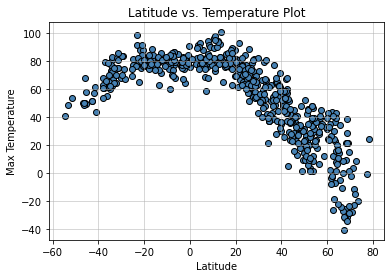

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/Latitude vs Max Temperature.png")

Looks like the highest temps are around the equator, however, it's still pretty hot in the northern hemisphere. As you look away from the equator the temperatures begin to drop, which makes sense. 

## Latitude vs. Humidity Plot

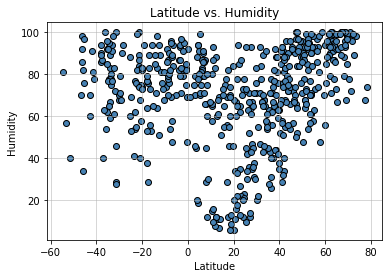

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/Latitude vs Humidity.png")

It looks like the northern hemisphere is more humid than the southern but both are pretty humid. The northern hemisphere is really humid at the 35-60 degrees latitude mark. 

## Latitude vs. Cloudiness Plot

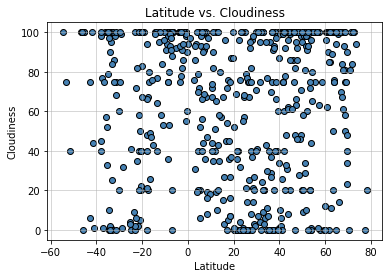

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/Latitude vs Cloudiness.png")

Cloudiness is everywhere, however it appears that the northern hemisphere is cloudier than the southern. 

## Latitude vs. Wind Speed Plot

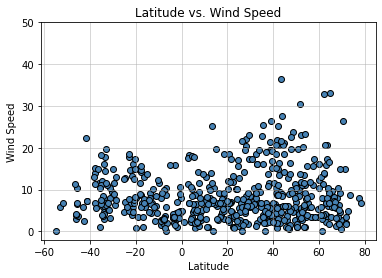

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/Latitude vs Wind Speed.png")

Wind speed is spread widely across the latitude, most cities have winnd speeds of 0- about 10 mph. Not a lot of cities have speeds over 25 mph.

## Linear Regression

In [15]:
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

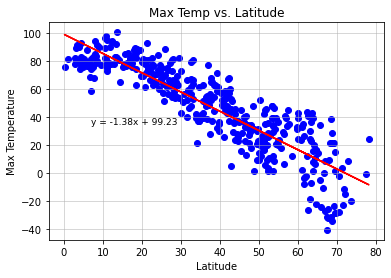

In [22]:
plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Max Temp'], facecolor = "blue")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp"])
regress_values = northern_hemisphere["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(7,35), fontsize=9,color="black")
plt.plot(northern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/N.H. Latitude vs Max Temp.png")

There is a bit of a correlation between the temp and latitude, as you look closer to the equator, the temperatures are higher

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

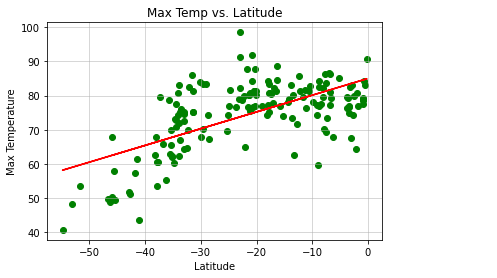

In [25]:
plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Max Temp'], facecolor = "green")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Max Temp"])
regress_values = southern_hemisphere["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(7,35), fontsize=9, color="black")
plt.plot(southern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/S.H. Latitude vs Max Temp.png")

There is a bit of a correlation between the temp and latitude, as you look closer to the equator, the temperatures are higher

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

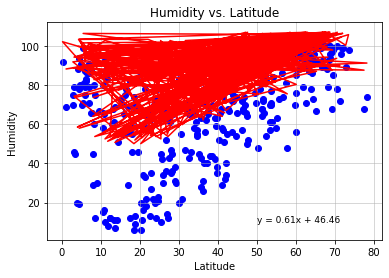

In [38]:
plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Humidity'],facecolor = "blue")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])
regress_values = northern_hemisphere["Humidity"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(50,10), fontsize=9,color="black")
plt.plot(northern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/N.H. Latitude vs Humidity.png")

Little correlation here. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

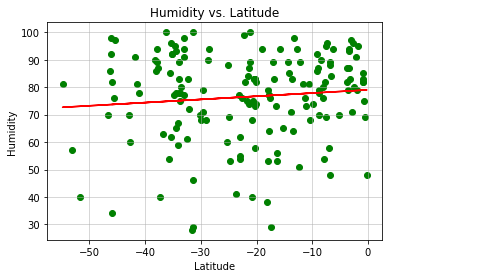

In [33]:
plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Humidity'], facecolor = "green")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])
regress_values = southern_hemisphere["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(6,30), fontsize=9,color="black")
plt.plot(southern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/S.H. Latitude vs Humidity.png")

There isnt much of a correlation here. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

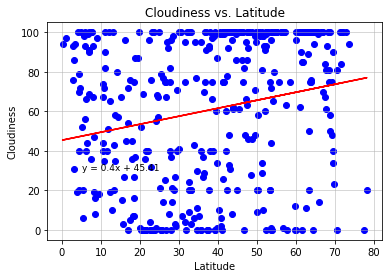

In [34]:
plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Cloudiness'], facecolor = "blue")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])
regress_values = northern_hemisphere["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(5,30), fontsize=9,color="black")
plt.plot(northern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/N.H. Cloudiness vs Latitude.png")

This shows that there is little correlation between the latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

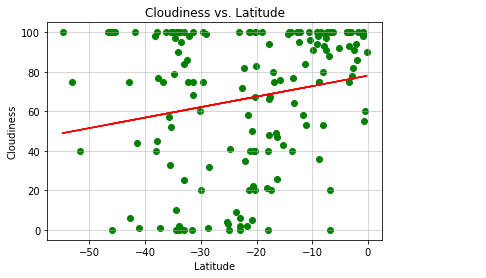

In [35]:
plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Cloudiness'], facecolor = "green")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])
regress_values = southern_hemisphere["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(5,30), fontsize=9,color="black")
plt.plot(southern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/S.H. Latitude vs Cloudiness.png")

This shows that there is little correlation between the latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

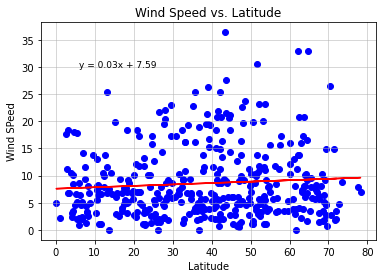

In [40]:
plt.scatter(northern_hemisphere['Latitude'], northern_hemisphere['Wind Speed'], facecolor = "blue")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind SPeed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])
regress_values = northern_hemisphere["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(6,30), fontsize=9,color="black")
plt.plot(northern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/N.H. Latitude vs Wind Speed.png")

There is little correlation to latitude and the speed of the wind.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

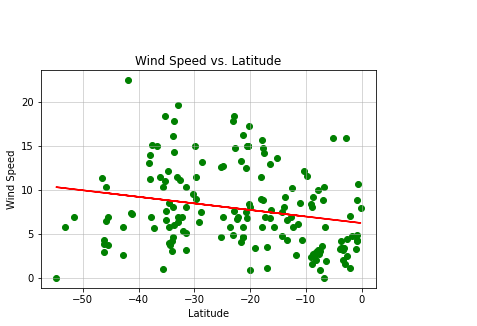

In [41]:
plt.scatter(southern_hemisphere['Latitude'], southern_hemisphere['Wind Speed'], facecolor = "green")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])
regress_values = southern_hemisphere["Latitude"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(5,30), fontsize=9,color="black")
plt.plot(southern_hemisphere["Latitude"],regress_values,"r-")

plt.savefig("../Images/S.H. Latitude vs Wind Speed.png")

There is little correlation to latitude and the speed of the wind.